# Preparation

In [1]:

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import numpy as np
import pandas as pd
data = pd.read_csv("/home/ui556004/projects/musicbert_hf/scripts/wandb_logs/wandb_nas_more_1_wo_60.csv")
len(data)

59

In [2]:
targets = ["inversion", "quality", "primary_alteration_primary_degree_secondary_alteration_secondary_degree" , "key_pc_mode" ]

In [3]:
data.columns.values

array(['Name', 'State', 'Created', 'Group', 'seed',
       'eval/inversion_accuracy', 'train/learning_rate',
       'eval/key_pc_mode_accuracy', 'eval/quality_accuracy',
       'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy',
       'freeze_layers', 'batch_size', 'train/global_step',
       'learning_rate',
       'primary_alteration_primary_degree_secondary_alteration_secondary_degree.normalisation',
       'quality.normalisation', 'key_pc_mode.normalisation',
       'inversion.normalisation',
       'primary_alteration_primary_degree_secondary_alteration_secondary_degree.linear_layers_dim',
       'quality.linear_layers_dim', 'key_pc_mode.linear_layers_dim',
       'quality.num_linear_layers',
       'primary_alteration_primary_degree_secondary_alteration_secondary_degree.num_linear_layers',
       'key_pc_mode.num_linear_layers', 'inversion.num_linear_layers',
       'End Time', 'Notes', 'eval/accuracy', 'quality.activation_fn',
       'invers

In [4]:
from ast import literal_eval

# converting arrays from strings back to arrays
columns = [column   for column in data.columns.values if not (column.endswith("__MIN") or column.endswith("__MAX") or column.startswith("Created") or column.startswith("End")  ) ]
data_filtered = data[columns]
columns_to_convert = [column for column in data_filtered.columns if (column.endswith("activation_fn") or column.endswith("normalisation"))]
for column in columns_to_convert:
    data_filtered[column] = data_filtered[column] .apply(literal_eval)
data_filtered.head()

/tmp/ui556004/login23-1_1958349/ipykernel_2013832/316338089.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[column] = data_filtered[column] .apply(literal_eval)


,Name,State,Group,seed,eval/inversion_accuracy,train/learning_rate,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,freeze_layers,...,key_pc_mode.activation_fn,hyperparams.key_pc_mode.activation_fn,hyperparams.inversion.activation_fn,hyperparams.inversion.pooler_dropout,hyperparams.freeze_layers,inversion.linear_layers_dim,test/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,test/quality_accuracy,test/key_pc_mode_accuracy,test/inversion_accuracy
0,trial_66,finished,attemtping_nas_1,42,0.841692,0.000976,0.799601,0.832264,0.702066,6,...,"[gelu, tanh, gelu]","[gelu, tanh, gelu]","[relu, tanh]","[0.07252291067204372,0.24678360127735793]",6,"[191,323]",NaN,NaN,NaN,NaN
1,trial_65,finished,attemtping_nas_1,42,0.848306,0.000235,0.818808,0.846518,0.712913,10,...,[gelu],[gelu],"[relu, relu, relu]","[0.10176332163597789,0.2687093885738218,0.1289...",10,"[422,509,408]",NaN,NaN,NaN,NaN
2,trial_64,finished,attemtping_nas_1,42,0.867527,0.000119,0.830710,0.862896,0.737418,7,...,"[gelu, gelu, gelu, tanh, gelu]","[gelu, gelu, gelu, tanh, gelu]","[gelu, relu, gelu, relu]","[0.1720921564063309,0.3158134759977812,0.10810...",7,"[356,199,438,490]",NaN,NaN,NaN,NaN
3,trial_63,finished,attemtping_nas_1,42,0.861144,0.000018,0.830422,0.861477,0.739730,7,...,"[gelu, relu, gelu, gelu]","[gelu, relu, gelu, gelu]","[relu, gelu, relu, tanh, relu]","[0.4070061036888229,0.22898985514259737,0.0630...",7,"[501,78,140,681,201]",NaN,NaN,NaN,NaN
4,trial_62,finished,attemtping_nas_1,42,0.848757,0.000514,0.800502,0.844687,0.721196,8,...,"[tanh, tanh, relu, tanh, relu]","[tanh, tanh, relu, tanh, relu]",[relu],[0.20342736945781617],8,[121],NaN,NaN,NaN,NaN


In [5]:
columns_acc =["Name"] + [column for column in data_filtered.columns.values if column.startswith("eval")]
data_eval = data_filtered[columns_acc]
data_eval.head(4)

,Name,eval/inversion_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,eval/accuracy
0,trial_66,0.841692,0.799601,0.832264,0.702066,0.793906
1,trial_65,0.848306,0.818808,0.846518,0.712913,0.806636
2,trial_64,0.867527,0.830710,0.862896,0.737418,0.824638
3,trial_63,0.861144,0.830422,0.861477,0.739730,0.823193


# Analysis

In [6]:
# adding test accuracies from the paper
baseline_paper = { 
    "Name" : "baseline (paper)",
     'eval/inversion_accuracy': 0.872,
            'eval/key_pc_mode_accuracy': 0.822,
            "eval/quality_accuracy": 0.867,
            'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy': 0.762,

}
baseline_paper["eval/accuracy"] = float(np.mean(list(baseline_paper.values())[1:]))
baseline_paper

{'Name': 'baseline (paper)',
 'eval/inversion_accuracy': 0.872,
 'eval/key_pc_mode_accuracy': 0.822,
 'eval/quality_accuracy': 0.867,
 'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy': 0.762,
 'eval/accuracy': 0.83075}

In [7]:
# adding evaluation accuracies from the recreated experiment by finetune.py
baseline_eval = { 
    "Name" : "baseline (eval)",
     'eval/inversion_accuracy': 0.8664,
            'eval/key_pc_mode_accuracy': 0.8329,
            "eval/quality_accuracy": 0.86623,
            'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy': 0.7565,

}
baseline_eval["eval/accuracy"] = float(np.mean(list(baseline_eval.values())[1:]))
baseline_eval

{'Name': 'baseline (eval)',
 'eval/inversion_accuracy': 0.8664,
 'eval/key_pc_mode_accuracy': 0.8329,
 'eval/quality_accuracy': 0.86623,
 'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy': 0.7565,
 'eval/accuracy': 0.8305075}

In [8]:
# altogether sorted by eval accuracy
df_baseline = pd.concat([pd.DataFrame([baseline_paper], columns=data_eval.columns), data_eval], axis=0,  ignore_index=True)
df_baseline = pd.concat([pd.DataFrame([baseline_eval], columns=df_baseline.columns), df_baseline], axis=0,  ignore_index=True)
df_baseline.sort_values(by = ["eval/accuracy"], ascending=False).head(10)

,Name,eval/inversion_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,eval/accuracy
26,trial_37,0.866007,0.836128,0.867276,0.756280,0.831423
1,baseline (paper),0.872000,0.822000,0.867000,0.762000,0.830750
19,trial_44,0.865300,0.836752,0.864800,0.755756,0.830652
0,baseline (eval),0.866400,0.832900,0.866230,0.756500,0.830507
23,trial_40,0.866415,0.837870,0.860987,0.752601,0.829468
39,trial_24,0.868972,0.834920,0.863224,0.748096,0.828803
49,trial_13,0.865576,0.834458,0.862876,0.749232,0.828035
27,trial_36,0.866789,0.837876,0.862839,0.743245,0.827687
36,trial_27,0.869713,0.831433,0.862872,0.745222,0.827310
25,trial_38,0.863029,0.837641,0.863274,0.743023,0.826742


In [219]:
# 

for target in targets:
    best_acc_paper = []
    best_acc_eval = []
    acc_column = f"eval/{target}_accuracy"
    baseline_acc_paper = baseline_paper[acc_column]
    baseline_acc_eval = baseline_eval[acc_column]
    for index, row in df_baseline.iterrows():
        col_name = row["Name"]
        if (row[acc_column] >= baseline_acc_paper and "baseline" not in col_name):
            best_acc_paper.append (col_name)
        if (row[acc_column] >= baseline_acc_eval and "baseline" not in col_name):
            best_acc_eval.append (col_name)
    print(f"for {target} trials better than paper are {best_acc_paper} ")
    print(f"for {target} trials better than eval are   {best_acc_eval} ")
        #if row[acc_column] 

for inversion trials better than paper are [] 
for inversion trials better than eval are   ['trial_64', 'trial_56', 'trial_40', 'trial_36', 'trial_35', 'trial_27', 'trial_26', 'trial_24'] 
for quality trials better than paper are ['trial_37'] 
for quality trials better than eval are   ['trial_37'] 
for primary_alteration_primary_degree_secondary_alteration_secondary_degree trials better than paper are [] 
for primary_alteration_primary_degree_secondary_alteration_secondary_degree trials better than eval are   [] 
for key_pc_mode trials better than paper are ['trial_64', 'trial_63', 'trial_61', 'trial_58', 'trial_56', 'trial_55', 'trial_54', 'trial_52', 'trial_51', 'trial_50', 'trial_44', 'trial_43', 'trial_41', 'trial_40', 'trial_39', 'trial_38', 'trial_37', 'trial_36', 'trial_35', 'trial_34', 'trial_33', 'trial_32', 'trial_31', 'trial_30', 'trial_29', 'trial_27', 'trial_26', 'trial_25', 'trial_24', 'trial_21', 'trial_19', 'trial_18', 'trial_17', 'trial_15', 'trial_13', 'trial_12', 'tr

In [220]:
# altogether sorted by eval accuracy
df_baseline = pd.concat([pd.DataFrame([baseline_paper], columns=data_eval.columns), data_eval], axis=0,  ignore_index=True)
df_baseline = pd.concat([pd.DataFrame([baseline_eval], columns=df_baseline.columns), df_baseline], axis=0,  ignore_index=True)
df_baseline.sort_values(by = ["eval/inversion_accuracy"], ascending=False).head(10)

,Name,eval/inversion_accuracy,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,eval/accuracy
1,baseline (paper),0.872000,0.822000,0.867000,0.762000,0.830750
37,trial_26,0.870157,0.833059,0.864956,0.737704,0.826469
36,trial_27,0.869713,0.831433,0.862872,0.745222,0.827310
39,trial_24,0.868972,0.834920,0.863224,0.748096,0.828803
28,trial_35,0.868174,0.835534,0.863952,0.720197,0.821964
4,trial_64,0.867527,0.830710,0.862896,0.737418,0.824638
11,trial_56,0.867089,0.829485,0.864917,0.742258,0.825937
27,trial_36,0.866789,0.837876,0.862839,0.743245,0.827687
23,trial_40,0.866415,0.837870,0.860987,0.752601,0.829468
0,baseline (eval),0.866400,0.832900,0.866230,0.756500,0.830507


In [ ]:
from optuna.importance import get_param_importances, FanovaImportanceEvaluator
#new_root  = r"C:\Users\Marina\genres\1517-Artists_reduced"
#root = r"P:\datasets\geenres\1517\1517_new\1517\1517-Artists_reduced" # r"C:\Users\Marina\genres\1517-Artists"
import os
import optuna
pruner = optuna.pruners.MedianPruner(n_warmup_steps=0)
sampler = optuna.samplers.TPESampler(seed=42, 
                                         multivariate=True,
                                         warn_independent_sampling=False)
study = optuna.create_study(study_name="attemtping_nas_1",
                                directions= ["maximize", "maximize","maximize", "maximize"],
                                sampler = sampler,
                                pruner = pruner,
                                storage = "sqlite:///optuna_nas.db",
                                load_if_exists=True )
imps = get_param_importances(study, target=lambda t: t.values[0], evaluator=FanovaImportanceEvaluator())
print(imps)
best_trials = study.best_trials
print(best_trials)
# quality, inversion, key,  degree

[I 2025-08-26 17:25:41,887] Using an existing study with name 'attemtping_nas_1' instead of creating a new one.


{'layer_dim_inversion_1': np.float64(0.550558634568667), 'learning_rate': np.float64(0.15252724173169535), 'pooler_dropout_primary_alteration_primary_degree_secondary_alteration_secondary_degree_1': np.float64(0.03687404067537883), 'layer_dim_primary_alteration_primary_degree_secondary_alteration_secondary_degree_2': np.float64(0.035994161076414934), 'pooler_dropout_primary_alteration_primary_degree_secondary_alteration_secondary_degree_4': np.float64(0.024921881373078613), 'pooler_dropout_inversion_0': np.float64(0.018114391991324516), 'layer_dim_inversion_0': np.float64(0.017819408634269198), 'layer_dim_primary_alteration_primary_degree_secondary_alteration_secondary_degree_0': np.float64(0.016268807769090336), 'freeze_layers': np.float64(0.01438089491888785), 'layer_dim_quality_3': np.float64(0.010152219499526927), 'pooler_dropout_inversion_2': np.float64(0.009607678086058058), 'activation_fn_key_pc_mode_3': np.float64(0.009127419877177412), 'activation_fn_quality_5': np.float64(0.0

In [117]:
import optuna
from optuna.trial import TrialState
from optuna.importance import FanovaImportanceEvaluator, get_param_importances

# 1) pick which trials to keep
def some_condition(t: optuna.trial.FrozenTrial) -> bool:
    # example: exclude trials with a specific tag/param/value
    return t.number == 60

valid_trials = [
    t for t in study.get_trials(deepcopy=False)
    if t.state == TrialState.COMPLETE and not some_condition(t)
]

# 2) a minimal Study-like wrapper
class FilteredStudy:
    def __init__(self, base_study: optuna.Study, trials):
        self._trials = trials
        self.directions = base_study.directions  # used by importance code

    # Used by importance: must accept deepcopy + states
    def get_trials(self, deepcopy: bool = True, states=None):
        if states is None:
            out = self._trials
        else:
            allowed = set(states)
            out = [t for t in self._trials if t.state in allowed]
        # optuna returns FrozenTrials; copying isn’t required for importance
        return list(out)

    # Used when target is None (multi-objective check)
    def _is_multi_objective(self) -> bool:
        return len(self.directions) > 1



In [191]:
import itertools
filtered_study = FilteredStudy(study, valid_trials)

# quality, inversion, key,  degree
evaluator = FanovaImportanceEvaluator()
imps = get_param_importances(
    filtered_study,
    target=lambda t: t.values[1],
    evaluator=FanovaImportanceEvaluator(),
)
print(dict(itertools.islice(imps.items(), 5)))

# best_trials = study.best_trials
# print(len(best_trials))


{'pooler_dropout_inversion_3': np.float64(0.10091917523891433), 'layer_dim_primary_alteration_primary_degree_secondary_alteration_secondary_degree_2': np.float64(0.07829864055970764), 'learning_rate': np.float64(0.07136225920426921), 'pooler_dropout_primary_alteration_primary_degree_secondary_alteration_secondary_degree_4': np.float64(0.0707763436787873), 'pooler_dropout_key_pc_mode_3': np.float64(0.07020966400483693)}


# Visualisations

In [192]:
target = "inversion"
target_columns = [column for column in data_filtered.columns.values if target  in column]
df_target = data_filtered[target_columns][:30]
#df_inversion = df_inversion[df_inversion["eval/inversion_accuracy"] >= 0.78]
#df_inversion_one

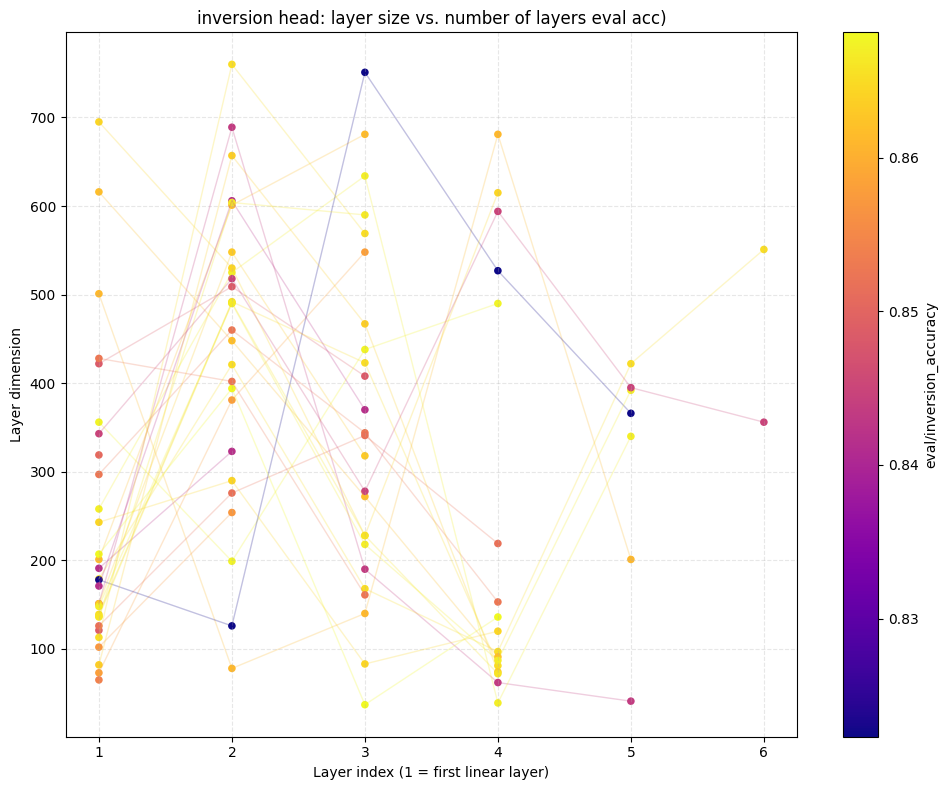

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

df = df_target.copy()

# --- Parse the linear layer dims column into a list of ints per row ---
def parse_dims(v):
    if isinstance(v, (list, tuple, np.ndarray)):
        return list(map(int, v))
    if pd.isna(v):
        return []
    if isinstance(v, str):
        v = v.strip()
        try:
            out = literal_eval(v)
            if isinstance(out, (list, tuple)):
                return list(map(int, out))
        except Exception:
            # Fallback: parse something like "128, 64, 32"
            v = v.strip("[]()")
            parts = [p.strip() for p in v.split(",") if p.strip()]
            try:
                return [int(p) for p in parts]
            except Exception:
                return []
    return []

df["__dims__"] = df[f"{target}.linear_layers_dim"].apply(parse_dims)

# --- Build long-form dataframe: one row per (config,row-layer) ---
rows = []
for ridx, row in df.iterrows():
    try:
        n_layers = int(row[f"{target}.num_linear_layers"])
    except Exception:
        # if it's str like "3"
        try:
            n_layers = int(str(row[f"{target}.num_linear_layers"]).strip())
        except Exception:
            continue

    dims = row["__dims__"]
    acc = float(row[f"eval/{target}_accuracy"])

    # Guard: only use available dims
    n = min(n_layers, len(dims))
    for layer_idx in range(1, n + 1):
        rows.append({
            "row_id": ridx,
            "layer": layer_idx,
            "dim": dims[layer_idx - 1],
            "acc": acc
        })

long_df = pd.DataFrame(rows)
if long_df.empty:
    raise ValueError("No points to plot: check your columns and data parsing.")

# --- Plot: scatter with shared color per config based on accuracy ---
fig, ax = plt.subplots(figsize=(10, 8))
norm = plt.Normalize(long_df["acc"].min(), long_df["acc"].max())
cmap = plt.cm.plasma

# Optionally connect the points of each config with a faint line
for rid, g in long_df.groupby("row_id"):
    color = cmap(norm(g["acc"].iloc[0]))
    ax.plot(g["layer"], g["dim"], color=color, alpha=0.25, linewidth=1)

sc = ax.scatter(
    long_df["layer"],
    long_df["dim"],
    c=long_df["acc"],
    cmap=cmap,
    norm=norm,
    s=30,
    edgecolors="none"
)

ax.set_xlabel("Layer index (1 = first linear layer)")
ax.set_ylabel("Layer dimension")
ax.set_xticks([1, 2, 3, 4, 5, 6])  # adjust if you have more/less
ax.set_title(f"{target} head: layer size vs. number of layers eval acc)")
cb = fig.colorbar(sc, ax=ax)
cb.set_label(f"eval/{target}_accuracy")

ax.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


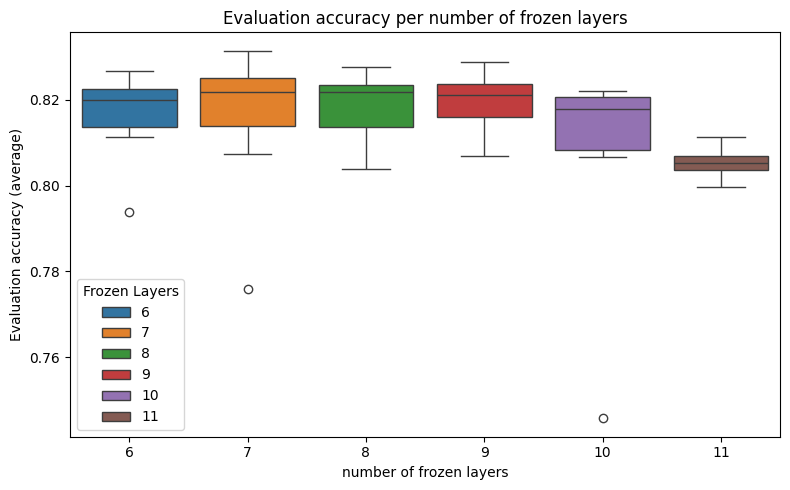

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
#data_filtered['freeze_layers'] = data_filtered['freeze_layers']  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
#sns.stripplot(data=data_filtered,  x='freeze_layers', y='eval/accuracy', hue='freeze_layers', palette='tab10', dodge=False)
sns.boxplot(data=data_filtered, x='freeze_layers', y='eval/accuracy', hue='freeze_layers', palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("number of frozen layers")
plt.ylabel("Evaluation accuracy (average)")
plt.title("Evaluation accuracy per number of frozen layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.savefig("figures/frozen_layers_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

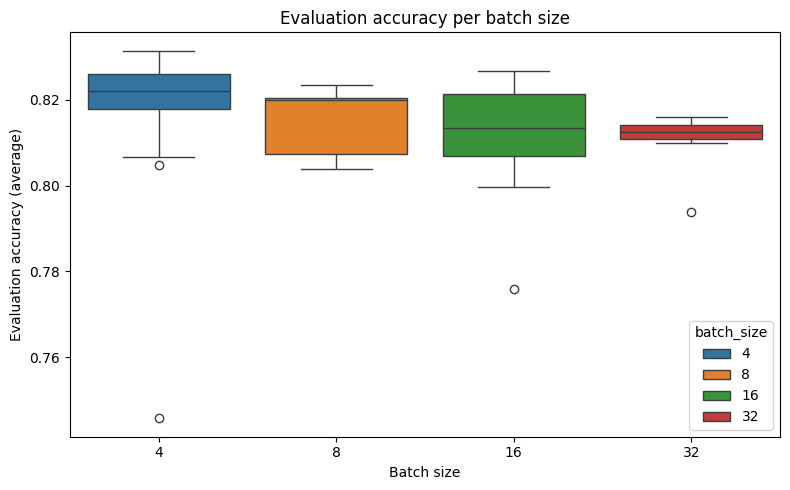

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
#data_filtered['batch_size'] = data_filtered['batch_size'].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
#sns.stripplot(data=data_filtered, x='batch_size', y='eval/accuracy', hue='batch_size', jitter=False, size=8, palette='tab10', dodge=False)
sns.boxplot(data=data_filtered,x='batch_size', y='eval/accuracy', hue='batch_size', palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Batch size")
plt.ylabel("Evaluation accuracy (average)")
plt.title("Evaluation accuracy per batch size")
#plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.savefig("figures/batch_size_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

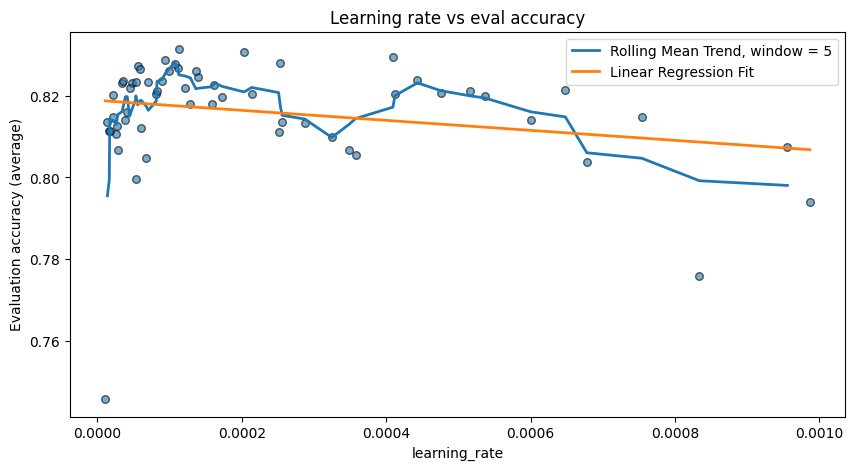

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assume df is already loaded with columns "dropout_top" and "eval/accuracy"
x = data_filtered["learning_rate"].values
y = data_filtered["eval/accuracy"].values

# Fit linear regression
X = x.reshape(-1, 1)
model = LinearRegression().fit(X, y)
coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

# Prepare data for plotting
order = np.argsort(x)
x_sorted = x[order]
y_pred_sorted = model.predict(x_sorted.reshape(-1, 1))

# Compute rolling mean for trend line
window = max(8, len(x) // 20)
y_smooth = pd.Series(y[order]).rolling(window= 5, min_periods=4, center=True).mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, alpha=0.6, edgecolors='k', s=30)
ax.plot(x_sorted, y_smooth, lw=2, label='Rolling Mean Trend, window = 5')
ax.plot(x_sorted, y_pred_sorted, lw=2, label='Linear Regression Fit')

ax.set_xlabel("learning_rate")
ax.set_ylabel("Evaluation accuracy (average)")
ax.set_title("Learning rate vs eval accuracy")
ax.legend()
plt.savefig("figures/learning_rate_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [28]:
data_filtered.columns.values

array(['Name', 'State', 'Group', 'seed', 'eval/inversion_accuracy',
       'train/learning_rate', 'eval/key_pc_mode_accuracy',
       'eval/quality_accuracy',
       'eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy',
       'freeze_layers', 'batch_size', 'train/global_step',
       'learning_rate', 'quality.num_linear_layers',
       'primary_alteration_primary_degree_secondary_alteration_secondary_degree.num_linear_layers',
       'key_pc_mode.num_linear_layers', 'inversion.num_linear_layers',
       'Notes', 'eval/accuracy',
       'hyperparams.inversion.linear_layers_dim',
       'hyperparams.key_pc_mode.activation_fn',
       'hyperparams.inversion.activation_fn',
       'hyperparams.inversion.normalisation',
       'hyperparams.inversion.pooler_dropout',
       'hyperparams.freeze_layers'], dtype=object)

/tmp/ui556004/login23-1_3311149/ipykernel_3698814/744711177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['inversion.num_linear_layers'] = data_filtered['inversion.num_linear_layers'].astype(str)  # or use Categorical if you want specific order
/tmp/ui556004/login23-1_3311149/ipykernel_3698814/744711177.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frozen Layers")


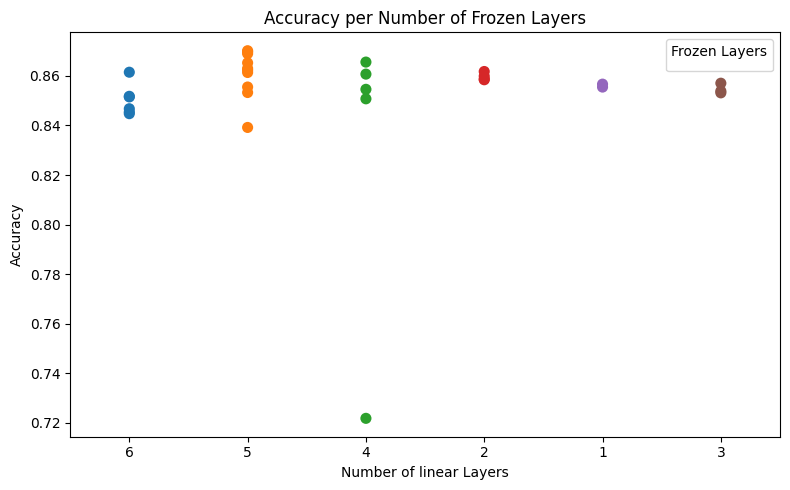

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
data_filtered['inversion.num_linear_layers'] = data_filtered['inversion.num_linear_layers'].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
sns.stripplot(data=data_filtered, x='inversion.num_linear_layers', y='eval/inversion_accuracy', hue='inversion.num_linear_layers', jitter=False, size=8, palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of linear Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def display_four(data_filtered, parameter, targets= None, mode = False, box = False, full_name = None):

    df = data_filtered.copy()

    def pick_col(frame, candidates):
        for c in candidates:
            if c in frame.columns:
                return c
        raise KeyError(f"None of {candidates} found in DataFrame columns.")
    
    suffix = ".mode" if mode else ""
    # Define targets with possible column-name variants
    targets = [
        ("Inversion",
        [f"inversion.{parameter}{suffix}"],
        ["eval/inversion_accuracy"]),
        ("Quality",
        [f"quality.{parameter}{suffix}"],
        ["eval/quality_accuracy"]),
        ("Degree",
        [f"primary_alteration_primary_degree_secondary_alteration_secondary_degree.{parameter}{suffix}"],
        ["eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy"]),
        ("Key",
        [f"key_pc_mode.{parameter}{suffix}"],
        ["eval/key_pc_mode_accuracy"]),
    ]
    fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
    axes = axes.ravel()

    for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
        layer_col = pick_col(df, layer_cands)
        acc_col   = pick_col(df, acc_cands)
        #ax.set_ylim(0.7, 0.9)

        # Make layer categorical (ordered by the numeric value)
        # Fall back to lexicographic if casting fails
        try:
            order = sorted(df[layer_col].dropna().astype(int).astype(str).unique(), key=lambda s: int(s))
        except Exception:
            order = sorted(df[layer_col].dropna().astype(str).unique())

        plot_df = df.copy()
        plot_df[layer_col] = plot_df[layer_col].astype(str)
        # if mode:
        #     order = sorted(plot_df[layer_col].dropna().astype(str).unique())
        # Jittered points + per-layer mean trend
        if box:
            sns.boxplot(data=plot_df, x=layer_col, y=acc_col, dodge=False, ax = ax, order = order)
        else:
            sns.stripplot(
                data=plot_df, x=layer_col, y=acc_col,
                order=order, jitter=True, size=5, ax=ax
            )

        # Overlay means per number of layers
            means = (plot_df.groupby(layer_col, observed=True)[acc_col]
                            .mean()
                            .reindex(order))
            ax.plot(order, means.values, marker='o')

        ax.set_xlabel(f"{parameter}")
        ax.set_ylabel(f"Evaluation accuracy")
        ax.set_title(f" {name}")
        ax.grid(True, axis='y', linestyle='--', alpha=0.4)

    fig.suptitle(f"Accuracy per {full_name} (by target)", y=0.98)
    plt.tight_layout()
    suffix = "with_mode" if mode else ""
    plt.savefig(f"figures/{parameter}_{suffix}_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
    return targets

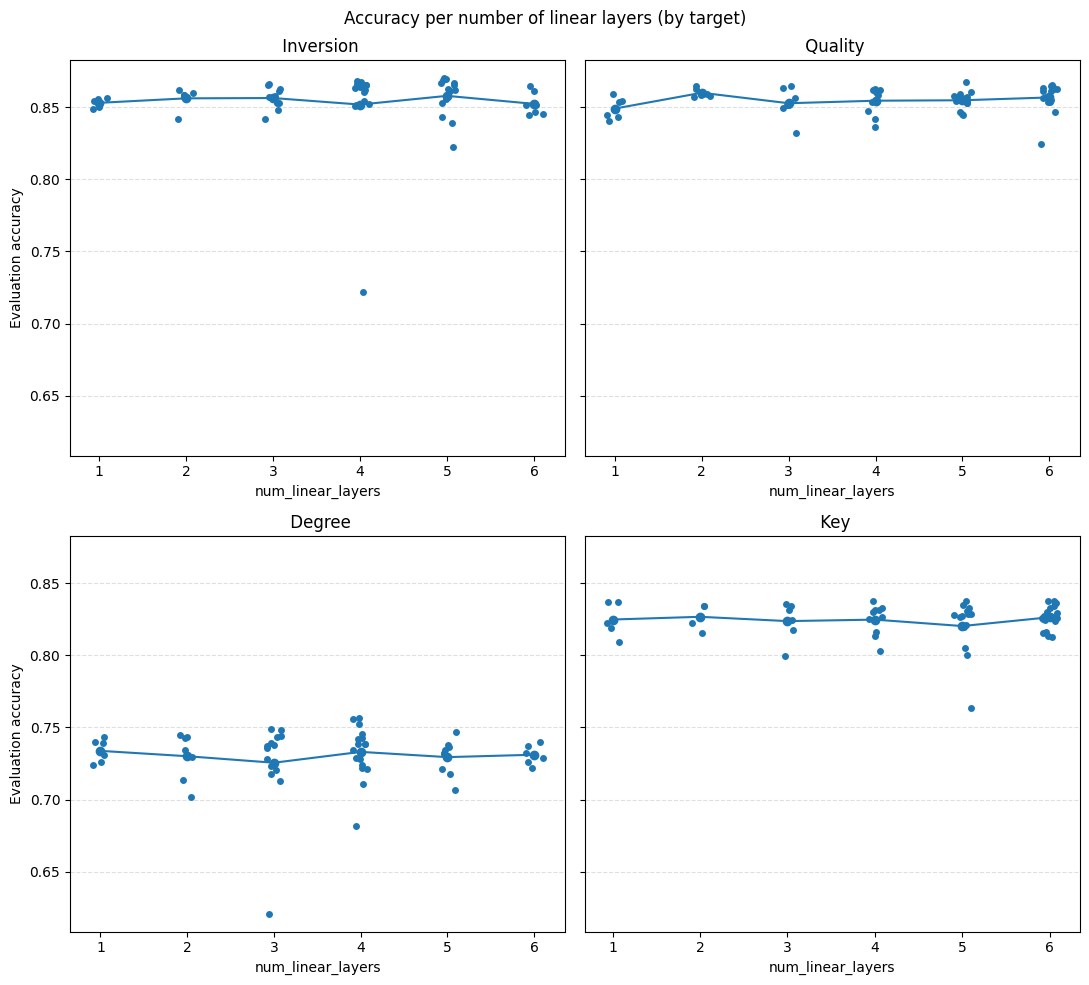

In [96]:
targets =display_four(data_filtered, parameter= "num_linear_layers", full_name = "number of linear layers", box = False)

In [97]:
import statistics 
def get_mode(parameter, target, data):
    statistics.mode(data_filtered[f"{target}.{parameter}"][0])
    data[f"{target}.{parameter}.mode"] =  data_filtered[f"{target}.{parameter}"].apply(lambda x : statistics.mode(x))
    return data

In [98]:
def create_df_unique_activation (df, target):
    mask = df[f"{target}.activation_fn"].apply(
        lambda v: len(set(v)) == 1
    )
    df_target = df.loc[mask, [f"{target}.activation_fn", f"eval/{target}_accuracy"]]
    df_target[f"{target}.activation_fn_unique"] = df_target [f"{target}.activation_fn"].apply(
        lambda v: v[0]
    )
    return df_target

In [223]:
def create_df_parameter(df, target, parameter):
    # Check if all activations are the same
    def check_unique(v):
        unique = set(v)
        return list(unique)[0] if len(unique) == 1 else "mix"
    print(f"{target}.{parameter}")
    df_target = df[[f"{target}.{parameter}", f"eval/{target}_accuracy"]].copy()
    
    df_target[f"{target}.{parameter}_unique"] = df_target[f"{target}.{parameter}"].apply(check_unique)
    return df_target

In [100]:
def create_df_not_unique_activation (df, target):
    mask = df[f"{target}.activation_fn"].apply(
        lambda v: len(set(v)) > 1
    )
    df_target = df.loc[mask, [f"{target}.activation_fn", f"eval/{target}_accuracy"]]
    df_target[f"{target}.activation_fn_unique"] = df_target [f"{target}.activation_fn"].apply(
        lambda v: "mix"
    )
    return df_target

inversion.activation_fn
quality.activation_fn
primary_alteration_primary_degree_secondary_alteration_secondary_degree.activation_fn
key_pc_mode.activation_fn


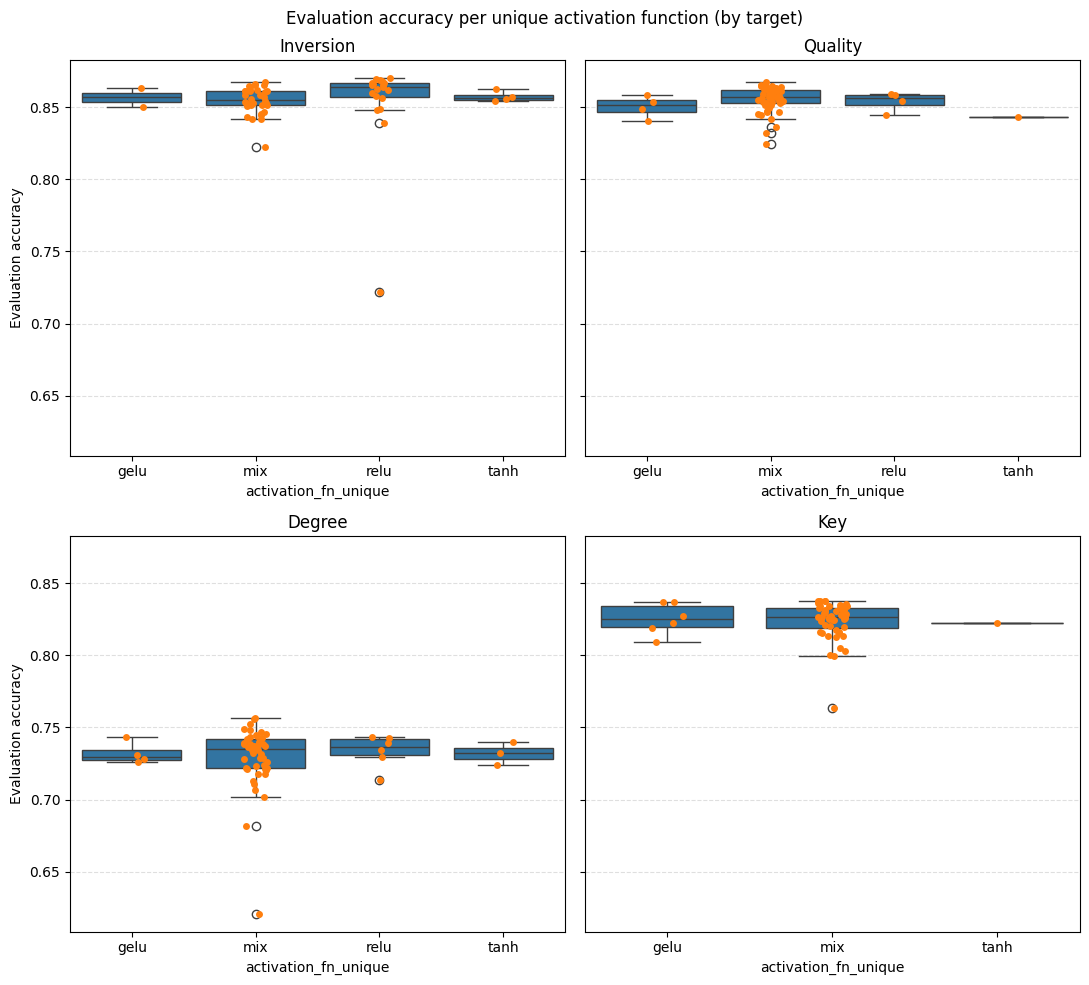

In [206]:
df_activation_array = []
df_not_unique_activatin_array = []
targets = ["inversion", "quality", "primary_alteration_primary_degree_secondary_alteration_secondary_degree" , "key_pc_mode" ]
for target in targets:
    df_target = create_df_parameter (data_filtered,target, "activation_fn")
    df_activation_array.append(df_target)
parameter = "activation_fn_unique"
suffix = ""
box = True
def pick_col(frame, candidates):
        for c in candidates:
            if c in frame.columns:
                return c
        raise KeyError(f"None of {candidates} found in DataFrame columns.")
targets = [
        ("Inversion",
        [f"inversion.{parameter}{suffix}"],
        ["eval/inversion_accuracy"]),
        ("Quality",
        [f"quality.{parameter}{suffix}"],
        ["eval/quality_accuracy"]),
        ("Degree",
        [f"primary_alteration_primary_degree_secondary_alteration_secondary_degree.{parameter}{suffix}"],
        ["eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy"]),
        ("Key",
        [f"key_pc_mode.{parameter}{suffix}"],
        ["eval/key_pc_mode_accuracy"]),
    ]
fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
axes = axes.ravel()
i = 0
for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
    layer_col = pick_col(df_activation_array[i], layer_cands)
    acc_col   = pick_col(df_activation_array[i], acc_cands)

    plot_df = df_activation_array[i].copy()
    plot_df[layer_col] = plot_df[layer_col].astype(str)
    order = sorted(plot_df[layer_col].dropna().astype(str).unique())
    #print(order)
    # Jittered points + per-layer mean trend
    if box:
        sns.boxplot(data=plot_df, x=layer_col, y=acc_col, dodge=False, ax = ax, order = order)
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )
    else:
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )

    ax.set_xlabel(f"{parameter}")
    ax.set_ylabel("Evaluation accuracy")
    ax.set_title(f"{name}")
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)
    i += 1

fig.suptitle(f"Evaluation accuracy per unique activation function (by target)", y=0.98)
plt.tight_layout()
plt.savefig(f"figures/unique_activation_function_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

inversion.normalisation
quality.normalisation
primary_alteration_primary_degree_secondary_alteration_secondary_degree.normalisation
key_pc_mode.normalisation


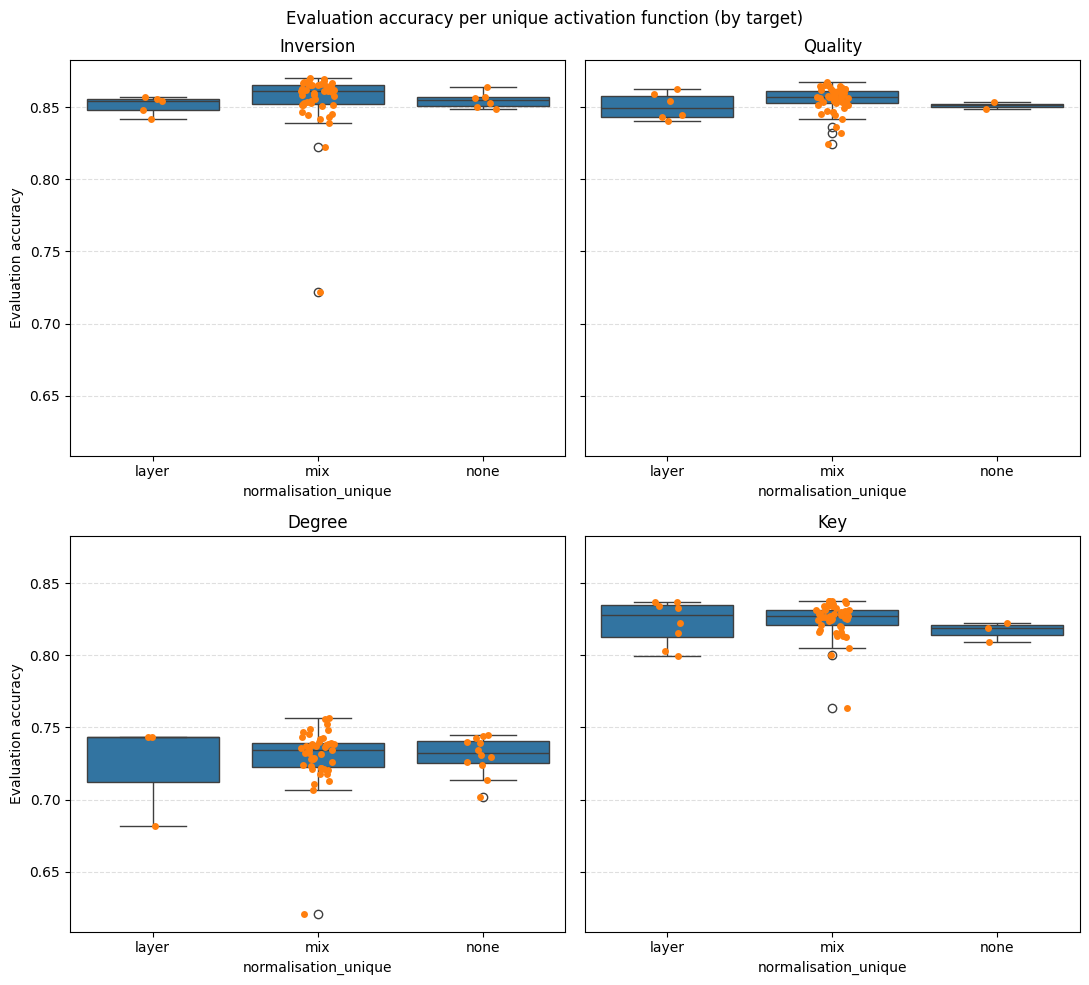

In [229]:
df_activation_array = []
df_not_unique_activatin_array = []
targets = ["inversion", "quality", "primary_alteration_primary_degree_secondary_alteration_secondary_degree" , "key_pc_mode" ]
for target in targets:
    df_target = create_df_parameter (data_filtered,target, "normalisation")
    df_activation_array.append(df_target)
parameter = "normalisation_unique"
suffix = ""
box = True
def pick_col(frame, candidates):
        for c in candidates:
            if c in frame.columns:
                return c
        raise KeyError(f"None of {candidates} found in DataFrame columns.")
targets = [
        ("Inversion",
        [f"inversion.{parameter}{suffix}"],
        ["eval/inversion_accuracy"]),
        ("Quality",
        [f"quality.{parameter}{suffix}"],
        ["eval/quality_accuracy"]),
        ("Degree",
        [f"primary_alteration_primary_degree_secondary_alteration_secondary_degree.{parameter}{suffix}"],
        ["eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy"]),
        ("Key",
        [f"key_pc_mode.{parameter}{suffix}"],
        ["eval/key_pc_mode_accuracy"]),
    ]
fig, axes = plt.subplots(2, 2, figsize=(11, 10), sharey=True)
axes = axes.ravel()
i = 0
for ax, (name, layer_cands, acc_cands) in zip(axes, targets):
    layer_col = pick_col(df_activation_array[i], layer_cands)
    acc_col   = pick_col(df_activation_array[i], acc_cands)

    plot_df = df_activation_array[i].copy()
    plot_df[layer_col] = plot_df[layer_col].astype(str)
    order = sorted(plot_df[layer_col].dropna().astype(str).unique())
    #print(order)
    # Jittered points + per-layer mean trend
    if box:
        sns.boxplot(data=plot_df, x=layer_col, y=acc_col, dodge=False, ax = ax, order = order)
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )
    else:
        sns.stripplot(
            data=plot_df, x=layer_col, y=acc_col,
             jitter=True, size=5, ax=ax, order = order
        )

    ax.set_xlabel(f"{parameter}")
    ax.set_ylabel("Evaluation accuracy")
    ax.set_title(f"{name}")
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)
    i += 1

fig.suptitle(f"Evaluation accuracy per unique activation function (by target)", y=0.98)
plt.tight_layout()
plt.savefig(f"figures/unique_activation_function_vs_eval_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
x = "activation_fn_unique"
y = "eval/quality_accuracy"
# Ensure freeze_layers is treated as categorical
#df_target[x] = df_target[x].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
#sns.stripplot(data=data_filtered, x='batch_size', y='eval/accuracy', hue='batch_size', jitter=False, size=8, palette='tab10', dodge=False)
sns.boxplot(data=df_target,x=x, y=y, hue=x, palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
plt.title("Accuracy per batch size")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

In [103]:
targets = ["inversion", "quality", "key_pc_mode","primary_alteration_primary_degree_secondary_alteration_secondary_degree" ]
parameter = "activation_fn"
data_filtered_copy = data_filtered.copy()
for target in targets:
    data_filtered_copy=  get_mode(parameter, target, data_filtered_copy)
data_filtered_copy.head()

,Name,State,Group,seed,eval/inversion_accuracy,train/learning_rate,eval/key_pc_mode_accuracy,eval/quality_accuracy,eval/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,freeze_layers,...,hyperparams.freeze_layers,inversion.linear_layers_dim,test/primary_alteration_primary_degree_secondary_alteration_secondary_degree_accuracy,test/quality_accuracy,test/key_pc_mode_accuracy,test/inversion_accuracy,inversion.activation_fn.mode,quality.activation_fn.mode,key_pc_mode.activation_fn.mode,primary_alteration_primary_degree_secondary_alteration_secondary_degree.activation_fn.mode
0,trial_66,finished,attemtping_nas_1,42,0.841692,0.000976,0.799601,0.832264,0.702066,6,...,6,"[191,323]",NaN,NaN,NaN,NaN,relu,tanh,gelu,relu
1,trial_65,finished,attemtping_nas_1,42,0.848306,0.000235,0.818808,0.846518,0.712913,10,...,10,"[422,509,408]",NaN,NaN,NaN,NaN,relu,relu,gelu,gelu
2,trial_64,finished,attemtping_nas_1,42,0.867527,0.000119,0.830710,0.862896,0.737418,7,...,7,"[356,199,438,490]",NaN,NaN,NaN,NaN,gelu,tanh,gelu,relu
3,trial_63,finished,attemtping_nas_1,42,0.861144,0.000018,0.830422,0.861477,0.739730,7,...,7,"[501,78,140,681,201]",NaN,NaN,NaN,NaN,relu,gelu,gelu,tanh
4,trial_62,finished,attemtping_nas_1,42,0.848757,0.000514,0.800502,0.844687,0.721196,8,...,8,[121],NaN,NaN,NaN,NaN,relu,relu,tanh,relu


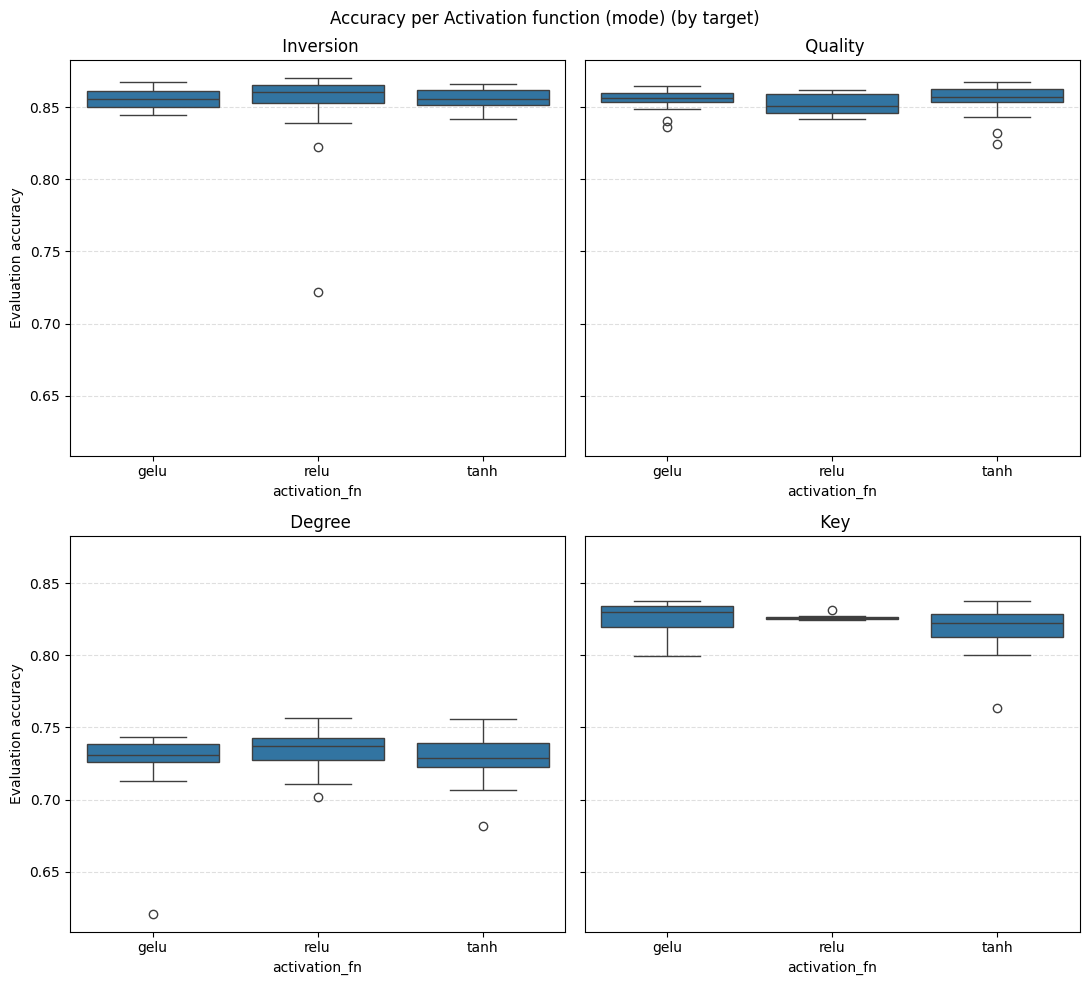

In [104]:
targets =display_four(data_filtered_copy, parameter= "activation_fn", mode = True, box = True, full_name="Activation function (mode)")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure freeze_layers is treated as categorical
data_filtered['inversion.activatin_fn'] = data_filtered['inversion.num_linear_layers'].astype(str)  # or use Categorical if you want specific order

# Create the plot
plt.figure(figsize=(8, 5))
sns.stripplot(data=data_filtered, x='inversion.num_linear_layers', y='eval/inversion_accuracy', hue='inversion.num_linear_layers', jitter=False, size=8, palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of linear Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()

/tmp/ui556004/login23-1_3311149/ipykernel_3698814/3230526467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["inverision.activation_fn.mode"] =  data_filtered['hyperparams.inversion.activation_fn'].apply(lambda x : statistics.mode(x))
/tmp/ui556004/login23-1_3311149/ipykernel_3698814/3230526467.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Frozen Layers")


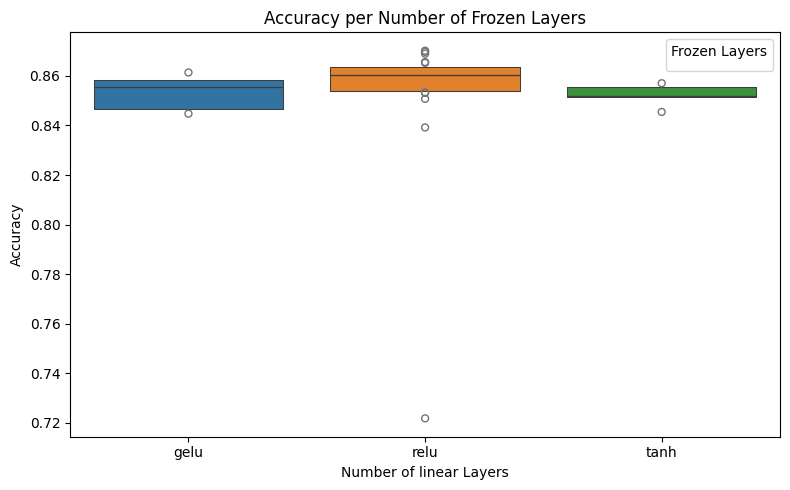

In [18]:
import statistics 
import seaborn as sns
import matplotlib.pyplot as plt
statistics.mode(data_filtered['hyperparams.inversion.activation_fn'][0])
data_filtered["inverision.activation_fn.mode"] =  data_filtered['hyperparams.inversion.activation_fn'].apply(lambda x : statistics.mode(x))


# Ensure freeze_layers is treated as categorica

# Create the plot
plt.figure(figsize=(8, 5))
sns.boxenplot(data=data_filtered, x="inverision.activation_fn.mode", y='eval/inversion_accuracy', hue="inverision.activation_fn.mode",  palette='tab10', dodge=False)

# Adjust plot
plt.xlabel("Number of linear Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy per Number of Frozen Layers")
plt.legend(title="Frozen Layers")
plt.tight_layout()
plt.show()